In [2]:
import pandas as pd
import os
import numpy as np
import datetime
import matplotlib.pyplot as plt
#import geopandas as gpd
import shapely as shp
#import descartes
#from shapely.geometry import Point, Polygon
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
url = 'https://www.dropbox.com/s/za6yp2mz6p560o1/uber_trips_2014_nta.csv.gz?dl=1'
uber_trips_2014_nta=pd.read_csv(url, compression='gzip')

In [3]:
uber_trips_2014_nta.head()

,Unnamed: 0,pickup_datetime,pickup_latitude,pickup_longitude,base,pickup_point,pickup_nta
0,0,4/1/14 0:11,40.7690,-73.9549,B02512,POINT (40.769 -73.95489999999999),NaN
1,1,4/1/14 0:17,40.7267,-74.0345,B02512,POINT (40.7267 -74.03449999999999),NaN
2,2,4/1/14 0:21,40.7316,-73.9873,B02512,POINT (40.7316 -73.9873),MN22
3,3,4/1/14 0:28,40.7588,-73.9776,B02512,POINT (40.7588 -73.9776),MN17
4,4,4/1/14 0:33,40.7594,-73.9722,B02512,POINT (40.7594 -73.9722),MN19


In [4]:
uber2015=pd.read_csv("C:/Users/Rodrigo Bernal/Desktop/DS4A_workspace/Datathon/Dataset/Dataset/uber_trips_2015.csv")

In [5]:
url = 'https://www.dropbox.com/s/pjovxyr8w6x6y5x/zones.csv?dl=1'
zones=pd.read_csv(url)

In [6]:
zones.head()

,location_id,borough,zone,service_zone,nta_code
0,1,EWR,Newark Airport,EWR,NJ01
1,2,Queens,Jamaica Bay,Boro Zone,QN61
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone,BX31
3,4,Manhattan,Alphabet City,Yellow Zone,MN22
4,5,Staten Island,Arden Heights,Boro Zone,SI48


In [6]:
uber_trips_2014_nta = pd.merge(uber_trips_2014_nta,zones, how='left' ,left_on=['pickup_nta'],right_on=['nta_code'])

In [7]:
uber_trips_2015_nta = pd.merge(uber2015,zones, how='left' ,left_on=['pickup_location_id'],right_on=['location_id'])
del uber2015

In [8]:
uber_trips_2014_nta.head()
del uber_trips_2014_nta['Unnamed: 0']
del uber_trips_2014_nta['pickup_latitude']
del uber_trips_2014_nta['pickup_longitude']
del uber_trips_2014_nta['base']
del uber_trips_2014_nta['pickup_point']
del uber_trips_2014_nta['pickup_nta']
#,'pickup_latitude','pickup_longitude','base','pickup_point','pickup_nta']

In [10]:
uber_trips_2014_nta.head()

,pickup_datetime,location_id,borough,zone,service_zone,nta_code
0,4/1/14 0:11,NaN,NaN,NaN,NaN,NaN
1,4/1/14 0:17,NaN,NaN,NaN,NaN,NaN
2,4/1/14 0:21,4.0,Manhattan,Alphabet City,Yellow Zone,MN22
3,4/1/14 0:21,79.0,Manhattan,East Village,Yellow Zone,MN22
4,4/1/14 0:28,161.0,Manhattan,Midtown Center,Yellow Zone,MN17


In [9]:
del uber_trips_2015_nta['pickup_location_id']
del uber_trips_2015_nta['dispatch_base']
del uber_trips_2015_nta['affiliate_base']
uber_trips_2015_nta.head()

,pickup_datetime,location_id,borough,zone,service_zone,nta_code
0,2015-05-17 09:47:00,141.0,Manhattan,Lenox Hill West,Yellow Zone,MN31
1,2015-05-17 09:47:00,65.0,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,BK38
2,2015-05-17 09:47:00,100.0,Manhattan,Garment District,Yellow Zone,MN13
3,2015-05-17 09:47:00,80.0,Brooklyn,East Williamsburg,Boro Zone,BK90
4,2015-05-17 09:47:00,90.0,Manhattan,Flatiron,Yellow Zone,MN13


In [10]:
uber_trips=uber_trips_2014_nta.append(uber_trips_2015_nta, ignore_index=True)
del uber_trips_2014_nta
del uber_trips_2015_nta

In [14]:
#uber_trips["pickup_datetime"]=pd.to_datetime(uber_trips["pickup_datetime"])
#uber_trips['date'] = uber_trips['pickup_datetime'].dt.date
#uber_trips['month_year'] = uber_trips['pickup_datetime'].dt.to_period('M')
#dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
#uber_trips['weekday']=uber_trips["pickup_datetime"].dt.dayofweek
#uber2015['daytype'] = np.where(uber2015['weekday']>=5, 'weekend', 'weekday')
#uber2015['weekday']=uber2015["date"].dt.dayofweek.map(dayOfWeek)
#uber_trips['hour']=uber_trips["pickup_datetime"].dt.hour

In [13]:
uber_trips.head()

,pickup_datetime,location_id,borough,zone,service_zone,nta_code
0,4/1/14 0:11,NaN,NaN,NaN,NaN,NaN
1,4/1/14 0:17,NaN,NaN,NaN,NaN,NaN
2,4/1/14 0:21,4.0,Manhattan,Alphabet City,Yellow Zone,MN22
3,4/1/14 0:21,79.0,Manhattan,East Village,Yellow Zone,MN22
4,4/1/14 0:28,161.0,Manhattan,Midtown Center,Yellow Zone,MN17


In [11]:
uber_trips_manhattan=uber_trips[uber_trips['borough']=='Staten Island']
del uber_trips

In [12]:
url = 'https://www.dropbox.com/s/7ixw7pe46q3theo/green_trips_nta.csv.gz?dl=1'
green_trips=pd.read_csv(url, compression='gzip')

In [16]:
green_trips.head()

,Unnamed: 0,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount,pickup_point,pickup_nta,dropoff_point,dropoff_nta
0,0,2015-02-01 01:26:45,2015-02-01 01:49:58,-73.953545,40.811172,-73.984764,40.728386,1,8.11,27.8,POINT (40.8111724854 -73.9535446167),MN09,POINT (40.7283859253 -73.9847640991),MN22
1,39,2015-03-31 16:02:29,2015-03-31 16:15:25,-73.962082,40.805218,-73.943817,40.810223,1,2.10,11.8,POINT (40.8052177429 -73.96208190919999),MN09,POINT (40.8102226257 -73.9438171387),MN03
2,41,2014-06-02 16:00:23,2014-06-02 16:12:52,-73.962128,40.805443,-73.987343,40.770370,1,3.10,15.0,POINT (40.8054428101 -73.96212768550001),MN09,POINT (40.7703704834 -73.9873428345),MN14
3,53,2014-07-28 09:50:09,2014-07-28 10:00:43,-73.957047,40.812580,-73.958046,40.782253,1,2.80,12.0,POINT (40.8125801086 -73.9570465088),MN09,POINT (40.7822532654 -73.9580459595),MN40
4,60,2014-06-30 12:17:24,2014-06-30 12:21:08,-73.959244,40.809258,-73.957703,40.815079,5,0.46,5.0,POINT (40.8092575073 -73.95924377439999),MN09,POINT (40.8150787354 -73.95770263670001),MN06


In [13]:
del green_trips['Unnamed: 0']
del green_trips['dropoff_datetime']
del green_trips['pickup_latitude']
del green_trips['pickup_longitude']
del green_trips['dropoff_latitude']
del green_trips['dropoff_longitude']
del green_trips['passenger_count']
del green_trips['trip_distance']
del green_trips['total_amount']
del green_trips['pickup_point']
del green_trips['dropoff_point']
del green_trips['dropoff_nta']
green_trips.head()

,pickup_datetime,pickup_nta
0,2015-02-01 01:26:45,MN09
1,2015-03-31 16:02:29,MN09
2,2014-06-02 16:00:23,MN09
3,2014-07-28 09:50:09,MN09
4,2014-06-30 12:17:24,MN09


In [14]:
green_trips=pd.merge(green_trips,zones, how='left' ,left_on=['pickup_nta'],right_on=['nta_code'])
del green_trips['pickup_nta']

In [15]:
green_trips_manhattan=green_trips[green_trips['borough']=='Staten Island']
del green_trips

In [16]:
url = 'https://www.dropbox.com/s/k4amamqkqf7ap92/yellow_trips_nta.csv.gz?dl=1'
yellow_trips=pd.read_csv(url, compression='gzip')

In [17]:
del yellow_trips['dropoff_datetime']
del yellow_trips['dropoff_longitude']
del yellow_trips['dropoff_latitude']
del yellow_trips['passenger_count']
del yellow_trips['trip_distance']
del yellow_trips['total_amount']
del yellow_trips['dropoff_point']
del yellow_trips['dropoff_nta']
del yellow_trips['pickup_point']
del yellow_trips['Unnamed: 0']
del yellow_trips['pickup_longitude']
del yellow_trips['pickup_latitude']
yellow_trips.head()

,pickup_datetime,pickup_nta
0,2014-04-16 15:42:00,MN20
1,2014-05-11 13:09:24,MN20
2,2014-04-24 23:29:00,MN20
3,2014-06-30 18:25:01,MN20
4,2014-04-07 12:11:05,MN20


In [18]:
yellow_trips=pd.merge(yellow_trips,zones, how='left' ,left_on=['pickup_nta'],right_on=['nta_code'])
del yellow_trips['pickup_nta']

In [19]:
yellow_trips_manhattan=yellow_trips[yellow_trips['borough']=='Staten Island']
del yellow_trips

In [23]:
#yellow_trips["pickup_datetime"]=pd.to_datetime(yellow_trips["pickup_datetime"])
#yellow_trips['date'] = yellow_trips['pickup_datetime'].dt.date
#yellow_trips['month_year'] = yellow_trips['pickup_datetime'].dt.to_period('M')
#dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
#yellow_trips['weekday']=yellow_trips["pickup_datetime"].dt.dayofweek
#uber2015['daytype'] = np.where(uber2015['weekday']>=5, 'weekend', 'weekday')
#uber2015['weekday']=uber2015["date"].dt.dayofweek.map(dayOfWeek)
#yellow_trips['hour']=yellow_trips["pickup_datetime"].dt.hour

In [20]:
uber_trips_manhattan['class']='Uber'
yellow_trips_manhattan['class']='Yellow'
green_trips_manhattan['class']='Green'

In [21]:
manhattan_trips=uber_trips_manhattan.append([yellow_trips_manhattan, green_trips_manhattan])
del uber_trips_manhattan
del yellow_trips_manhattan
del green_trips_manhattan

In [22]:
manhattan_trips["pickup_datetime"]=pd.to_datetime(manhattan_trips["pickup_datetime"])

In [23]:
manhattan_trips.head()
del manhattan_trips['location_id']
del manhattan_trips['borough']
del manhattan_trips['service_zone']


In [24]:
manhattan_trips['date']=manhattan_trips['pickup_datetime'].dt.date
#manhattan_trips['dayofweek']=manhattan_trips['pickup_datetime'].dt.dayofweek
#manhattan_trips['hour']=manhattan_trips['pickup_datetime'].dt.hour

In [31]:
manhattan_trips.head(1)

,pickup_datetime,zone,nta_code,class,date
2,2014-04-01 00:21:00,Alphabet City,MN22,Uber,2014-04-01


In [25]:
#manhattan_trips.groupby([yellow_trips['pickup_datetime'].dt.date,'zone']).size()#, columns=['number_of_trips']
manhattan_trips_by_date=pd.DataFrame(manhattan_trips.groupby(['date','class']).size(), columns=['number_of_trips'])
manhattan_trips_by_date.reset_index(inplace=True)

In [33]:
manhattan_trips_by_date.head()

,date,class,number_of_trips
0,2014-04-01,Green,2617
1,2014-04-01,Uber,38964
2,2014-04-01,Yellow,67318
3,2014-04-02,Green,2729
4,2014-04-02,Uber,49790


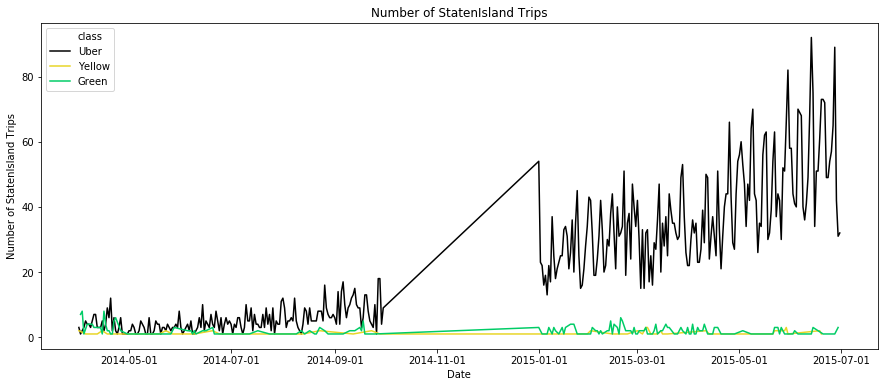

In [29]:
register_matplotlib_converters()
# Enhanced line plot for energy consumption over time
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(x='date', y='number_of_trips',data=manhattan_trips_by_date,hue='class', 
             ci=None, palette=["k", "#E8D527", "#00CC66"])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # format x-axis display
plt.title('Number of StatenIsland Trips')
plt.xlabel('Date');
plt.ylabel('Number of StatenIsland Trips');

In [41]:
del manhattan_trips_by_date
del manhattan_trips['date']
manhattan_trips['dayofweek']=manhattan_trips['pickup_datetime'].dt.dayofweek

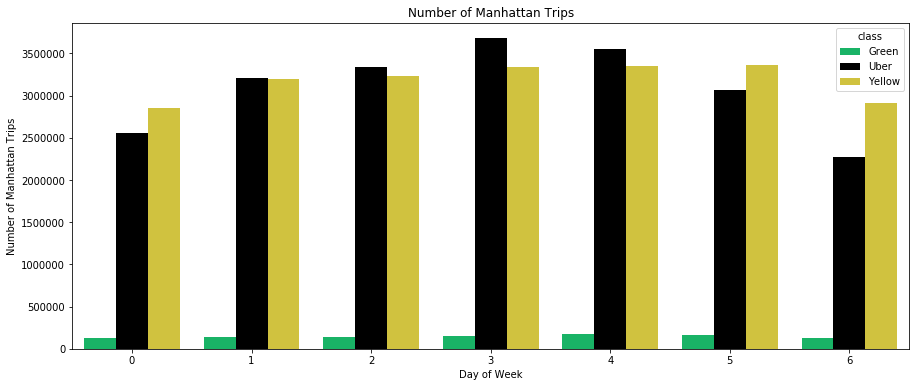

In [44]:
manhattan_trips_by_weekday=pd.DataFrame(manhattan_trips.groupby(['dayofweek','class']).size(), columns=['number_of_trips'])
manhattan_trips_by_weekday.reset_index(inplace=True)


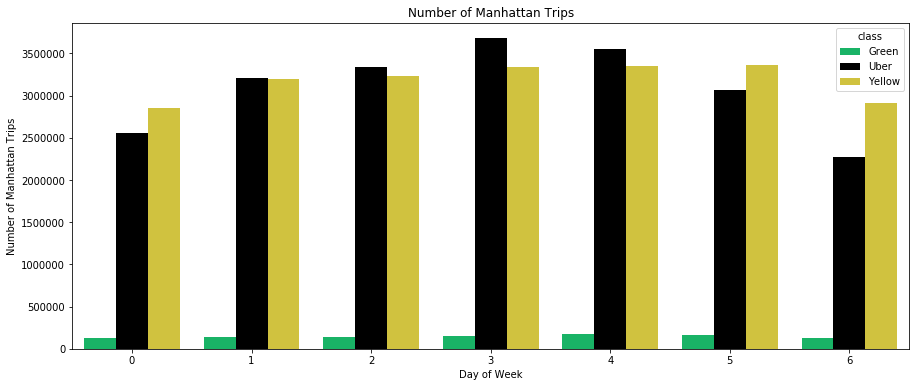

In [45]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x='dayofweek', y='number_of_trips',data=manhattan_trips_by_weekday,hue='class', 
             ci=None, palette=["#00CC66", "k", "#E8D527"])
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # format x-axis display
plt.title('Number of Manhattan Trips')
plt.xlabel('Day of Week');
plt.ylabel('Number of Manhattan Trips');

In [46]:
del manhattan_trips_by_weekday
del manhattan_trips['dayofweek']
manhattan_trips['month']=manhattan_trips['pickup_datetime'].dt.month

In [47]:
manhattan_trips_by_month=pd.DataFrame(manhattan_trips.groupby(['month','class']).size(), columns=['number_of_trips'])
manhattan_trips_by_month.reset_index(inplace=True)

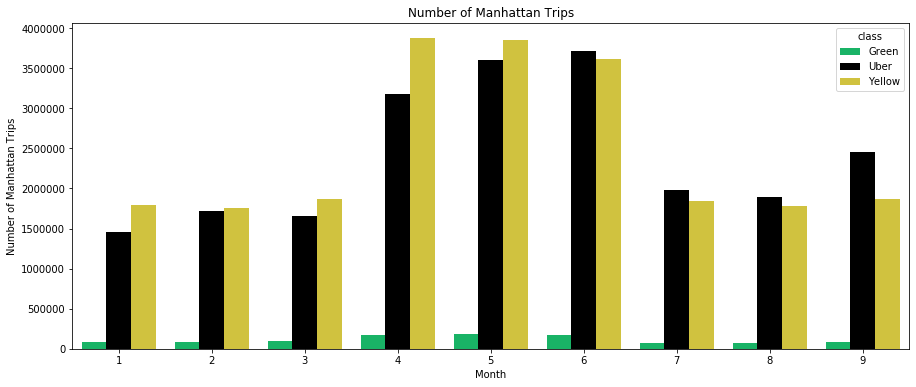

In [48]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x='month', y='number_of_trips',data=manhattan_trips_by_month,hue='class', 
             ci=None, palette=["#00CC66", "k", "#E8D527"])
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # format x-axis display
plt.title('Number of Manhattan Trips')
plt.xlabel('Month');
plt.ylabel('Number of Manhattan Trips');

In [53]:
del manhattan_trips_by_month
del manhattan_trips['month']
manhattan_trips['hour']=manhattan_trips['pickup_datetime'].dt.hour

MemoryError: 

In [50]:
manhattan_trips_by_hour=pd.DataFrame(manhattan_trips.groupby(['hour','class']).size(), columns=['number_of_trips'])
manhattan_trips_by_hour.reset_index(inplace=True)

MemoryError: 

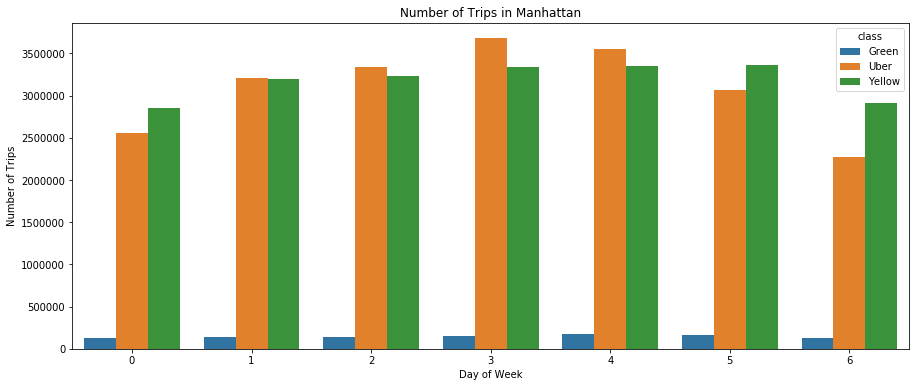

In [97]:
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x='month', y='number_of_trips',data=manhattan_trips_by_month,hue='class', 
             ci=None, palette=["#00CC66", "k", "#E8D527"])
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # format x-axis display
plt.title('Number of Manhattan Trips')
plt.xlabel('Month');
plt.ylabel('Number of Manhattan Trips');

In [102]:
del manhattan_trips_by_weekday

In [94]:
manhattan_trips_by_hour=pd.DataFrame(manhattan_trips.groupby([manhattan_trips['pickup_datetime'].dt.hour,'class']).size(), columns=['number_of_trips'])
manhattan_trips_by_hour.reset_index(inplace=True)

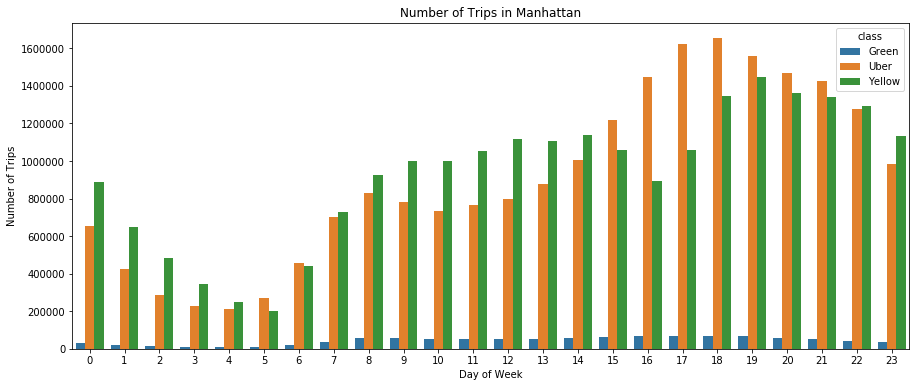

In [96]:
register_matplotlib_converters()
# Enhanced line plot for energy consumption over time
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x='pickup_datetime', y='number_of_trips',data=manhattan_trips_by_hour,hue='class')
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # format x-axis display
plt.title('Number of Trips in Manhattan')
plt.xlabel('Day of Week');
plt.ylabel('Number of Trips');

In [104]:
manhattan_trips_by_weekdayhour=pd.DataFrame(manhattan_trips.groupby(['dayofweek','hour','class']).size(), columns=['number_of_trips'])
manhattan_trips_by_weekdayhour.reset_index(inplace=True)

MemoryError: 

In [ ]:
register_matplotlib_converters()
# Enhanced line plot for energy consumption over time
fig, ax = plt.subplots(figsize=(15,6))
sns.barplot(x='pickup_datetime', y='number_of_trips',data=manhattan_trips_by_hour,hue='class')
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # format x-axis display
plt.title('Number of Trips in Manhattan')
plt.xlabel('Day of Week');
plt.ylabel('Number of Trips');

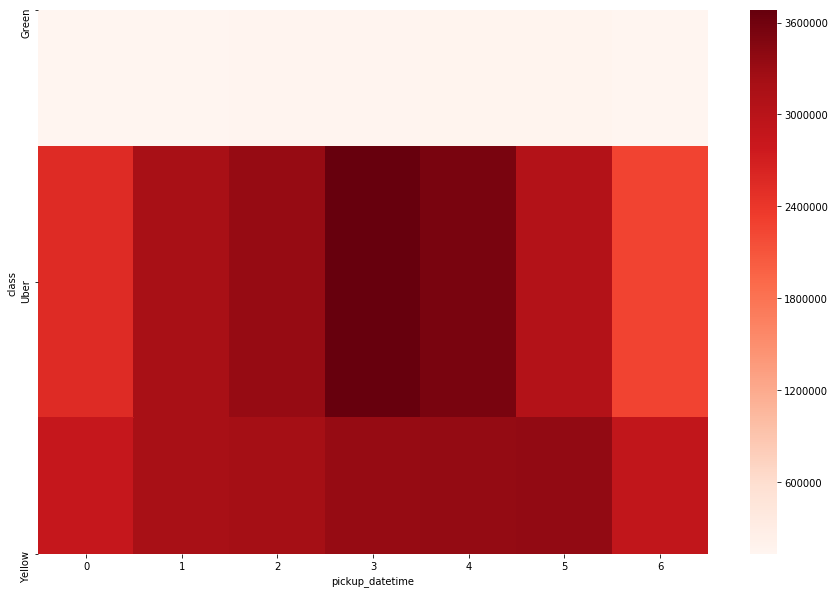

In [93]:
pivot_df = manhattan_trips_by_weekday.pivot('class','pickup_datetime','number_of_trips')
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pivot_df, cmap="Reds", ax=ax);
#ax.set_title('PEC Electric Power Sector');

In [ ]:
pivot_df = MAN_ubertrips_by_hourzone.pivot('zone','hour','number_of_trips')
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(pivot_df, cmap="Reds", ax=ax);
#ax.set_title('PEC Electric Power Sector');